<a href="https://colab.research.google.com/github/Nisarg111/Time-Series/blob/main/ARIMA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('https://github.com/Nisarg111/Time-Series/blob/main/Datasets/shampoo_dataset.csv?raw=true')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


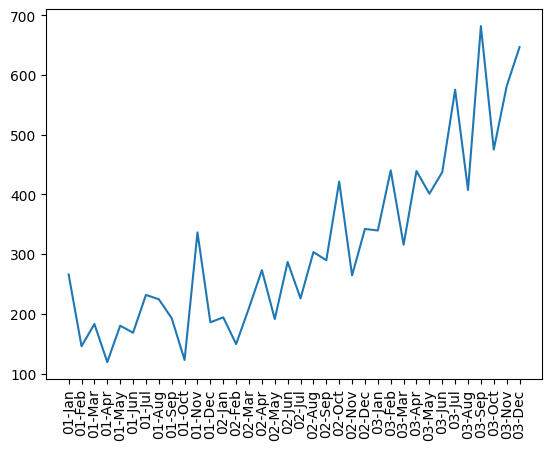

In [15]:
plt.plot(df['Month'], df['Sales'])
plt.xticks(rotation=90)
plt.show()

In [20]:
df.set_index(df['Month'], inplace=True)
df.drop('Month', axis=1, inplace=True)
df.head()

,Sales
Month,
01-Jan,266.0
01-Feb,145.9
01-Mar,183.1
01-Apr,119.3
01-May,180.3


In [21]:
result = adfuller(df)
result[1]

1.0

<Axes: xlabel='Month'>

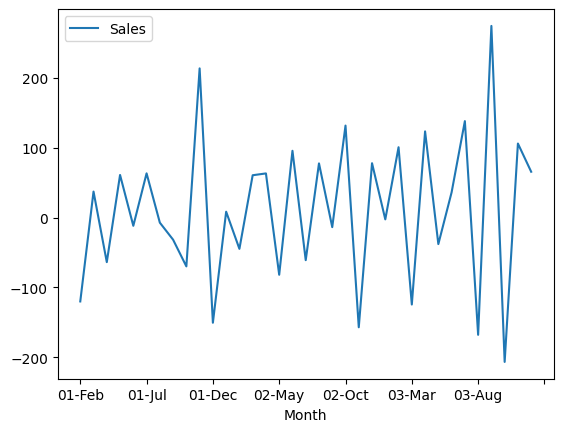

In [22]:
df_diff = df.diff().dropna()
df_diff.plot()

In [23]:
result = adfuller(df_diff)
result[1]

1.7998574141687034e-10

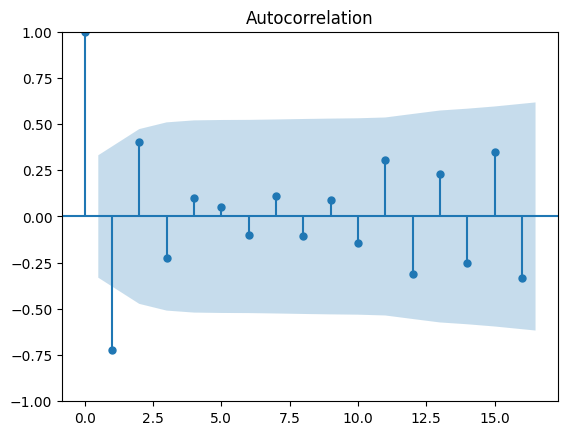

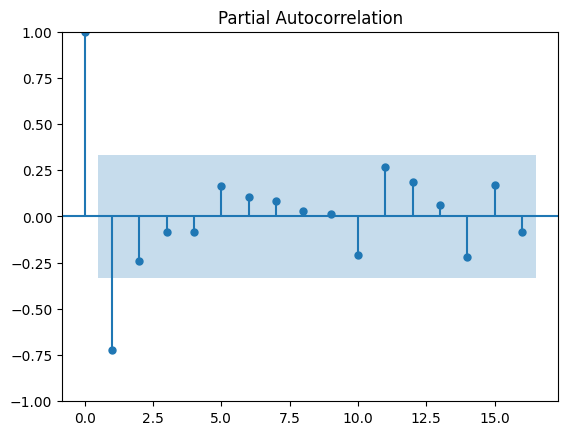

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_diff)
plot_pacf(df_diff)
plt.show()

In [32]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA order (p,d,q)
model = ARIMA(df_diff, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   35
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -192.060
Date:                Wed, 29 May 2024   AIC                            392.120
Time:                        11:00:20   BIC                            398.225
Sample:                             0   HQIC                           394.202
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4162      0.234     -1.777      0.076      -0.875       0.043
ma.L1         -1.9186      1.918     -1.000      0.317      -5.677       1.840
ma.L2          0.9905      1.971      0.502      0.6

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


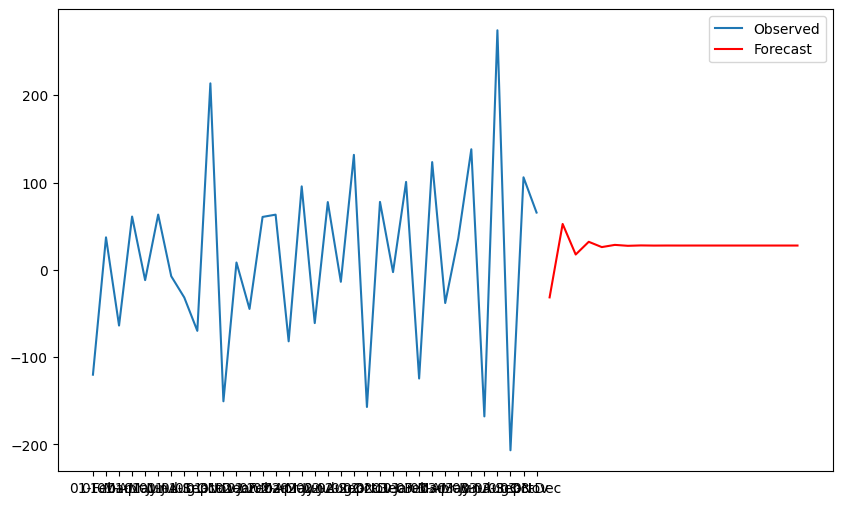

In [47]:
forecast = model_fit.forecast(steps=20)
plt.figure(figsize=(10, 6))
plt.plot(df_diff, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()